# **Transfer Learning**

Name: Mahesh Jagtap
Reg No 24Mcs1017

## About the Dataset



The Flowers dataset consists of a collection of images representing five different types of flowers: **Daisy**, **Sunflower**, **Tulip**, **Dandelion**, and **Rose**. This dataset is widely used for image classification tasks and is particularly well-suited for training Convolutional Neural Networks (CNNs) and exploring transfer learning techniques.



### Dataset Content



- **Number of Classes**: 5 (Daisy, Sunflower, Tulip, Dandelion, Rose)

- **Image Dimensions**: Initially, images were resized to \(224* 224\) pixels to standardize the input size for the model.

- **Number of Images**: The dataset contains a balanced number of images for each flower type, ensuring a fair representation during training.



## Objectives



In this project, I aimed to develop an effective image classification model using both custom CNN architectures and pre-trained models through transfer learning. The main objectives were:



1. **Build a Custom CNN Model**: Designed a Convolutional Neural Network from scratch to classify the flower images.

2. **Implement Transfer Learning**: Utilized well-known pre-trained models such as VGG16 and EfficientNetB3 to leverage their feature extraction capabilities for improved classification accuracy.

3. **Data Augmentation**: Applied various data augmentation techniques to enhance the training dataset and reduce overfitting.



## Methodology



1. **Data Preprocessing**: Images were resized and normalized for efficient processing. Data augmentation techniques like rotation, width shifts, and zoom were employed to diversify the training data.

   

2. **Model Development**:

   - **CNN Model**: Created a multi-layered CNN architecture with convolutional, pooling, dropout, and dense layers.

   - **Transfer Learning Models**: Integrated VGG16 and EfficientNetB3 architectures, adapting the output layers to match the number of flower classes.



3. **Training and Validation**: The models were trained on a portion of the dataset, while validation was performed on a separate test set to evaluate the model's performance.



## Results



- **Evaluation Metrics**: The models were evaluated using accuracy, confusion matrix, and classification reports to assess their performance across different flower classes.

- **Visualizations**: Various visualizations were generated to represent model predictions and to showcase the performance of each model.


# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import requests
from PIL import Image
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.models import Model

import os
import random
import shutil
import cv2
from tqdm import tqdm
from skimage.io import imread

# Data Preprocessing and Splitting for Flower Classification

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

X = []
Z = []

def assign_label(flower_type):
    if flower_type == 'daisy':
        return 1
    elif flower_type == 'dandelion':
        return 2
    elif flower_type == 'rose':
        return 3
    elif flower_type == 'sunflower':
        return 4
    elif flower_type == 'tulip':
        return 0

inputdataset = "/kaggle/input/flowers-recognition/flowers"

for flower in os.listdir(inputdataset):
    flower_path = os.path.join(inputdataset, flower)

    if not os.path.isdir(flower_path):
        continue

    for filename in os.listdir(flower_path):
        img_path = os.path.join(flower_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:
            print(f"Warning: {img_path} could not be loaded.")
            continue

        img = cv2.resize(img, (224, 224))
        label = assign_label(flower)
        X.append(np.array(img / 255))
        Z.append(label)

X = np.array(X)
Z = np.array(Z)

Y = to_categorical(Z, 5)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 224, 224, 3)
x_test shape:  (864, 224, 224, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


In [ ]:
# for 
# for downloaded dataset :
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define class labels
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Path to the locally downloaded dataset (Update this path)
dataset_path = "path/to/your/flowers_dataset"

# Function to assign numerical labels to classes
def assign_label(flower_type):
    class_dict = {'daisy': 1, 'dandelion': 2, 'rose': 3, 'sunflower': 4, 'tulip': 0}
    return class_dict.get(flower_type, -1)  # Default to -1 if not found

# Lists to store images and labels
X = []
Z = []

# Load images from each category folder
for flower in classes:
    flower_path = os.path.join(dataset_path, flower)
    
    if not os.path.isdir(flower_path):
        print(f"Skipping {flower_path} (not a directory)")
        continue

    for filename in os.listdir(flower_path):
        img_path = os.path.join(flower_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:
            print(f"Warning: {img_path} could not be loaded.")
            continue

        img = cv2.resize(img, (224, 224))  # Resize images to 224x224 (for CNN models like VGG16)
        label = assign_label(flower)
        
        X.append(np.array(img / 255.0))  # Normalize to [0,1]
        Z.append(label)

# Convert lists to NumPy arrays
X = np.array(X, dtype="float32")
Z = np.array(Z)

# One-hot encoding of labels
Y = to_categorical(Z, num_classes=5)

# Split dataset into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Z)

# Print dataset shapes
print("x_train shape: ", x_train.shape)  # e.g., (number, 224, 224, 3)
print("x_test shape: ", x_test.shape)    # e.g., (number, 224, 224, 3)
print("y_train shape: ", y_train.shape)  # e.g., (number, 5)
print("y_test shape: ", y_test.shape)    # e.g., (number, 5)


# Data Visualization

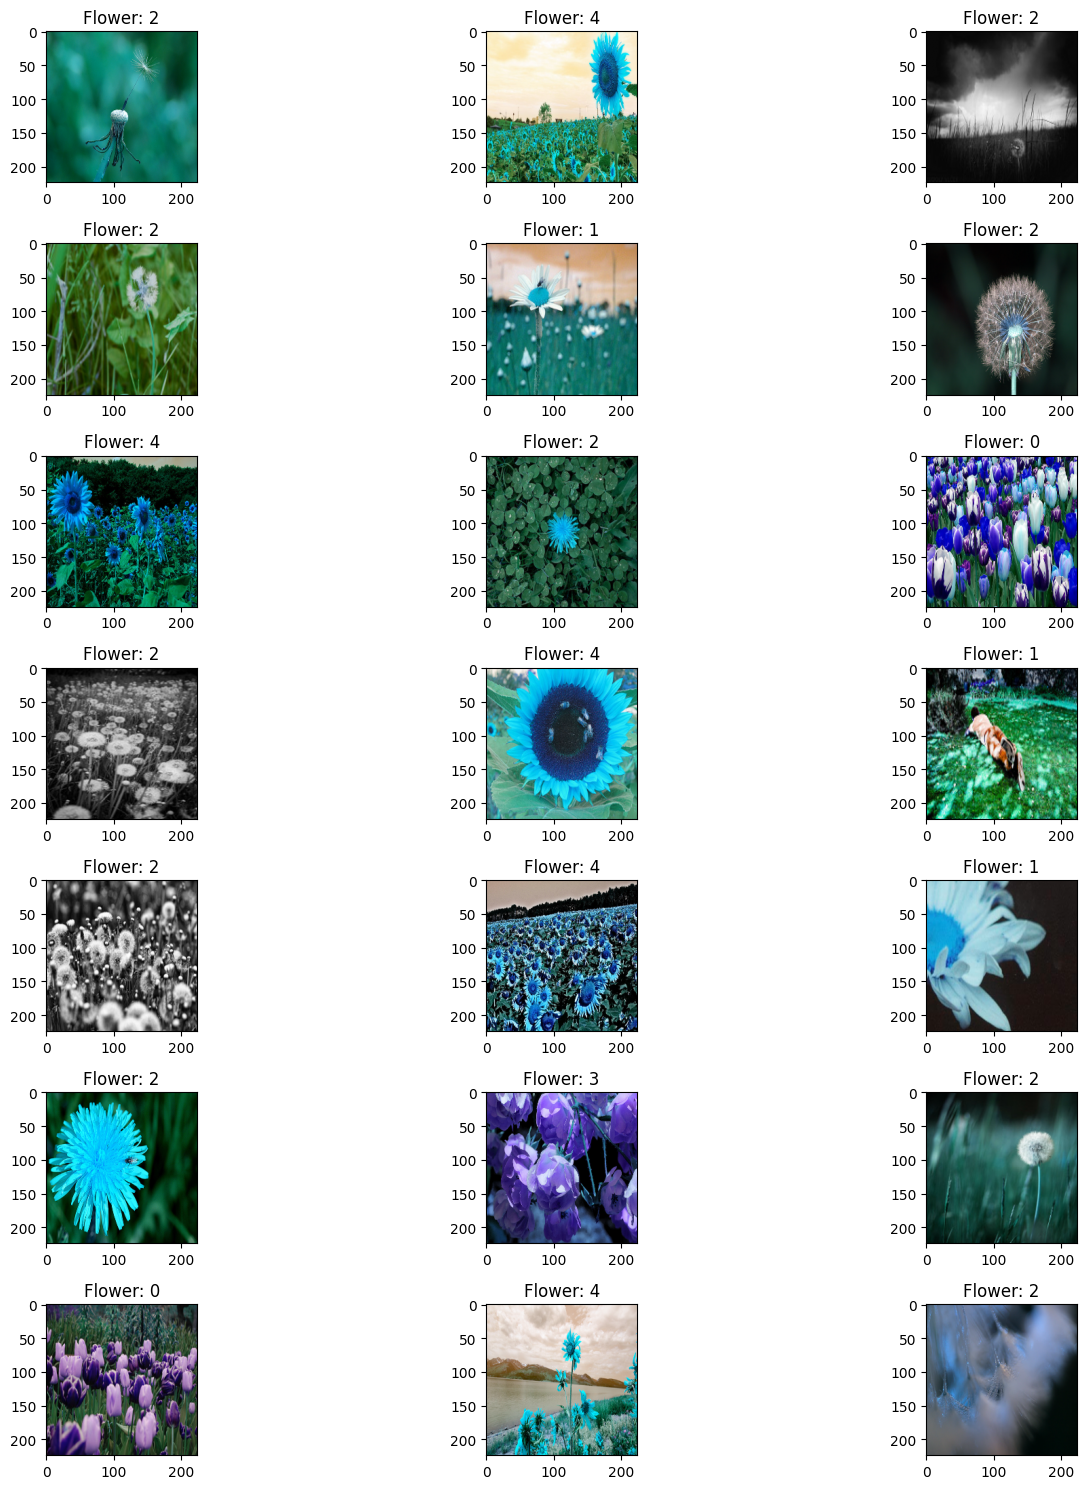

In [ ]:
figure, axes = plt.subplots(7, 3)
figure.set_size_inches(15, 15)

for row in range(7):
    for col in range(3):
        index = random.randint(0, len(X) - 1)

        image = X[index]
        flower_label = Z[index]

        axes[row, col].imshow(image)
        axes[row, col].set_title(f"Flower: {flower_label}")

plt.tight_layout()
plt.show()

In [ ]:
for flower_type in classes:
    class_directory = os.path.join(inputdataset, flower_type)

    max_pixel_values = []
    min_pixel_values = []

    for img_file in os.listdir(class_directory):
        image = imread(os.path.join(class_directory, img_file))

        max_pixel_values.append(image.max())
        min_pixel_values.append(image.min())

    max_value_per_class = np.max(max_pixel_values)
    min_value_per_class = np.min(min_pixel_values)

    print("***************************")
    print(f"Flower Type: {flower_type}")
    print(f"Maximum Pixel Value: {max_value_per_class}")
    print(f"Minimum Pixel Value: {min_value_per_class}")

print("***************************")

***************************
Flower Type: daisy
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: dandelion
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: rose
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: sunflower
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************
Flower Type: tulip
Maximum Pixel Value: 255
Minimum Pixel Value: 0
***************************


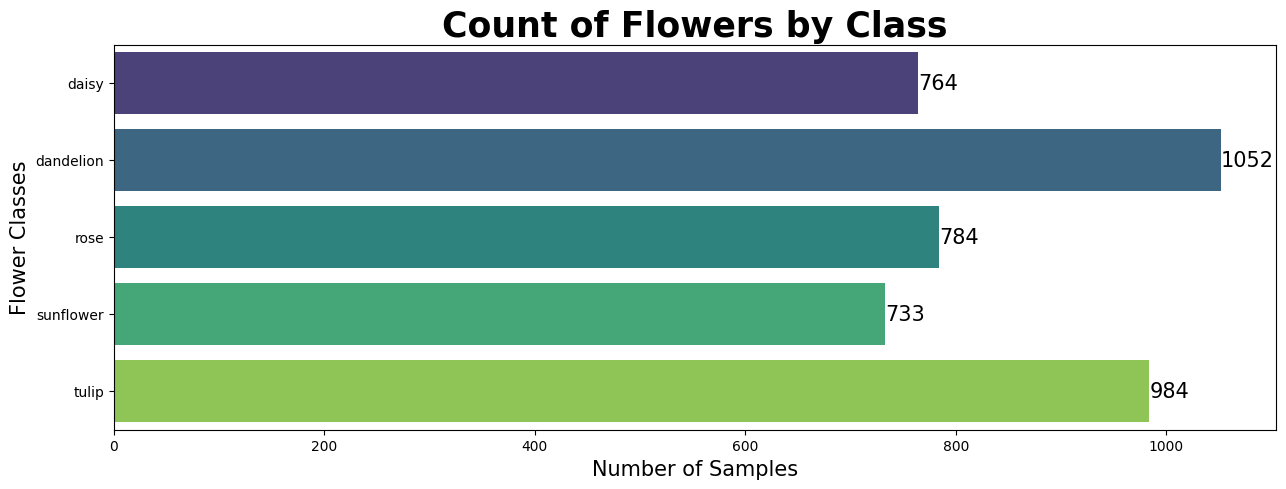

In [ ]:
flower_counts = []

for flower_class in classes:
    class_path = os.path.join(inputdataset, flower_class)
    flower_counts.append(len(os.listdir(class_path)))

plt.figure(figsize=(15, 5))
bar_plot = sns.barplot(x=flower_counts, y=classes, palette="viridis")
bar_plot.bar_label(bar_plot.containers[0], fontsize=15)

plt.title("Count of Flowers by Class", fontsize=25, fontweight="bold")
plt.xlabel("Number of Samples", fontsize=15)
plt.ylabel("Flower Classes", fontsize=15)

plt.show()

# Building and Training the CNN Model with Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.25))

cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnnmodel_history = cnn_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(x_test, y_test))

Epoch 1/30


I0000 00:00:1728559506.367405    1993 service.cc:145] XLA service 0x7f6084005c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728559506.367469    1993 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728559506.367477    1993 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/108 ━━━━━━━━━━━━━━━━━━━━ 22:29 13s/step - accuracy: 0.3438 - loss: 1.6135

I0000 00:00:1728559514.632693    1993 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 379ms/step - accuracy: 0.3257 - loss: 1.5216 - val_accuracy: 0.5336 - val_loss: 1.1663
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step - accuracy: 0.4926 - loss: 1.1870 - val_accuracy: 0.6088 - val_loss: 0.9602
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 299ms/step - accuracy: 0.6051 - loss: 1.0079 - val_accuracy: 0.6493 - val_loss: 0.8681
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 300ms/step - accuracy: 0.6179 - loss: 0.9535 - val_accuracy: 0.6898 - val_loss: 0.7964
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 297ms/step - accuracy: 0.6582 - loss: 0.8821 - val_accuracy: 0.6921 - val_loss: 0.8566
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 296ms/step - accuracy: 0.6774 - loss: 0.8437 - val_accuracy: 0.7245 - val_loss: 0.7675
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 303ms/step - accuracy: 0.6856 - loss: 0.8097 - val_accuracy: 0.7188 - val_loss: 0.8171
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step - accuracy: 0.6912 - loss: 0.7918 - val

# Evaluate the CNN Model Performance

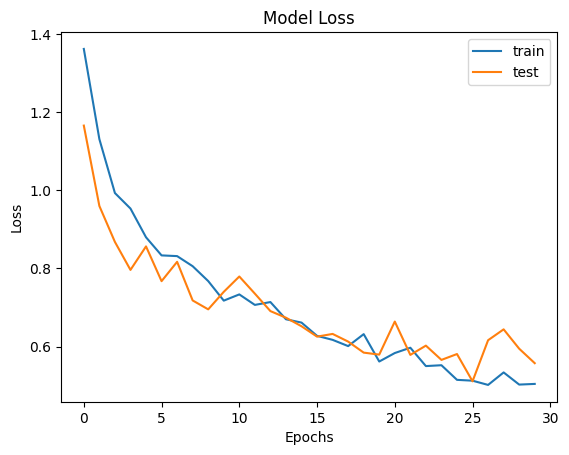

In [ ]:
plt.plot(cnnmodel_history.history['loss'])
plt.plot(cnnmodel_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

The graph shows that both training and testing losses decrease over 30 epochs, indicating the model is learning and generalizing well without overfitting. The improvement is rapid initially and becomes gradual over time.

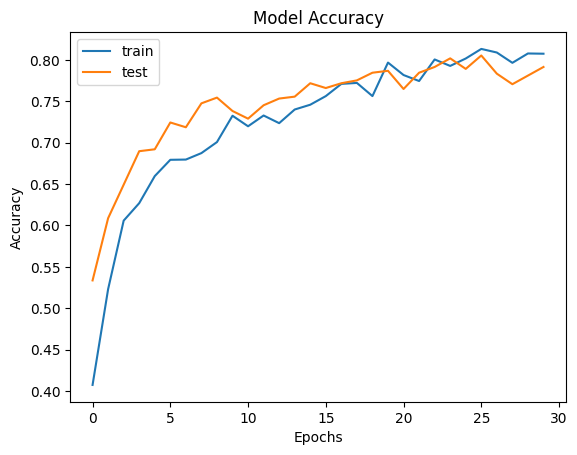

In [ ]:
plt.plot(cnnmodel_history.history['accuracy'])
plt.plot(cnnmodel_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Training Accuracy: Starts around 55% and increases to about 80% over 30 epochs.

Testing Accuracy: Starts around 60% and increases to about 79%, showing more variability than training accuracy.

Overall, both training and testing accuracies improve over time, with training accuracy slightly higher than testing accuracy in the end.

In [ ]:
loss, accuracy =cnn_model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = cnn_model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy:  0.8471
Testing Accuracy:  0.7917


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Classification Report
              precision    recall  f1-score   support

       Daisy       0.65      0.84      0.73       179
   Dandelion       0.84      0.80      0.82       161
        Rose       0.81      0.88      0.84       224
   Sunflower       0.82      0.59      0.69       156
       Tulip       0.93      0.81      0.86       144

    accuracy                           0.79       864
   macro avg       0.81      0.78      0.79       864
weighted avg       0.80      0.79      0.79       864



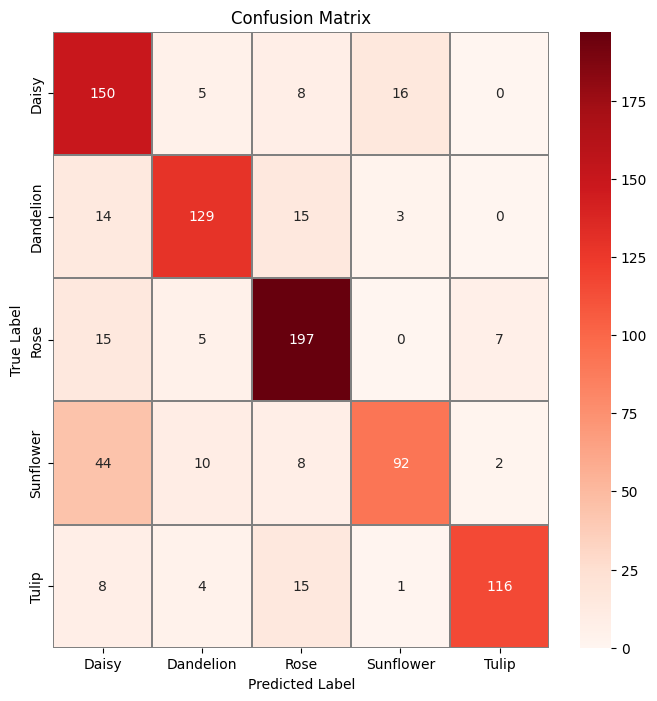

In [ ]:
Y_pred = cnn_model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

print("Classification Report")

target_names = ["Daisy", "Dandelion", "Rose", "Sunflower", "Tulip"]
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, cmap="Reds", linecolor='gray', linewidth=0.01, annot=True, fmt='d',

            xticklabels=target_names, yticklabels=target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Transfer Learning

## Flowers Classification with EfficientNetB3 Model

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_data = train_datagen.flow(x_train, y_train, batch_size=32)
test_data = test_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(5, activation='softmax')(x)
efficientnet_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
efficientnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

efficientnet_history = efficientnet_model.fit(train_data, epochs=30, validation_data=test_data, callbacks=[early_stop])

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.5942 - loss: 1.0652 - val_accuracy: 0.1863 - val_loss: 1.6440
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.8857 - loss: 0.3336 - val_accuracy: 0.1424 - val_loss: 1.6620
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 333ms/step - accuracy: 0.9331 - loss: 0.1984 - val_accuracy: 0.3750 - val_loss: 1.4664
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - accuracy: 0.9577 - loss: 0.1358 - val_accuracy: 0.6424 - val_loss: 0.9740
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - accuracy: 0.9641 - loss: 0.1120 - val_accuracy: 0.8090 - val_loss: 0.5399
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step - accuracy: 0.9744 - loss: 0.0850 - val_accuracy: 0.8831 - val_loss: 0.3602
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - accuracy: 0.9700 - loss: 0.0831 - val_accuracy: 0.9178 - val_loss: 0.2814
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 332ms/step - accuracy: 0.9804 - loss: 0.0

In [ ]:
loss, accuracy = efficientnet_model.evaluate(train_data)
print(f"Train Loss: {loss}")
print(f"Train Accuracy: {accuracy}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 342ms/step - accuracy: 0.9976 - loss: 0.0144
Train Loss: 0.013449671678245068
Train Accuracy: 0.9973935484886169


In [ ]:
loss, accuracy = efficientnet_model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9461 - loss: 0.2342
Test Loss: 0.23577411472797394
Test Accuracy: 0.9421296119689941


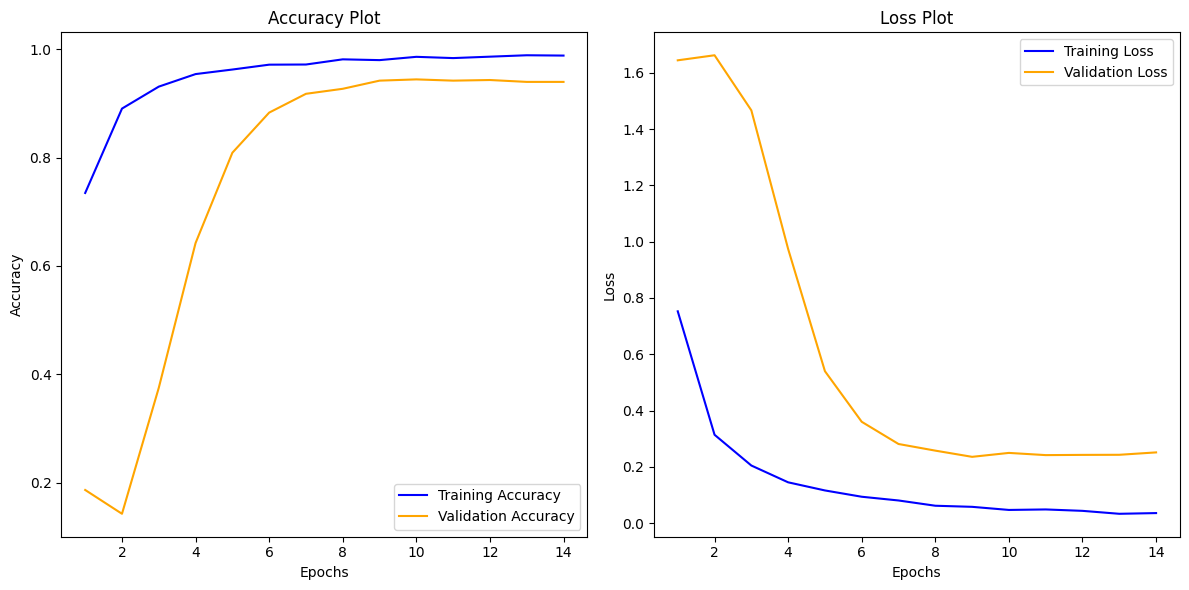

In [ ]:
accuracy = efficientnet_history.history['accuracy']
val_accuracy = efficientnet_history.history['val_accuracy']
loss = efficientnet_history.history['loss']
val_loss = efficientnet_history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy Plot: Training accuracy plateaus around 0.98, validation accuracy around 0.94 over 15 epochs. Loss Plot: Training loss approaches zero, validation loss levels off around 0.2.

In [ ]:
y_pred_probs = efficientnet_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred, target_names = classes)
print(report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step
              precision    recall  f1-score   support

       daisy       0.92      0.90      0.91       179
   dandelion       0.96      0.94      0.95       161
        rose       0.98      0.96      0.97       224
   sunflower       0.91      0.94      0.92       156
       tulip       0.93      0.97      0.95       144

    accuracy                           0.94       864
   macro avg       0.94      0.94      0.94       864
weighted avg       0.94      0.94      0.94       864



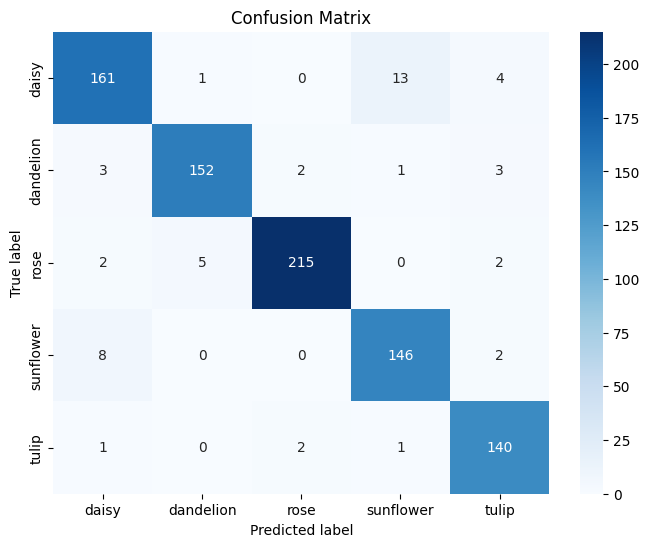

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

## VGG16

### Flowers Classification with VGG16 Model

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    '/kaggle/input/flowers-recognition/flowers',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = train_datagen.flow_from_directory(
    '/kaggle/input/flowers-recognition/flowers',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

vgg16_model = Model(inputs=base_model.input, outputs=predictions)

vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
VGGmodel_history = vgg16_model.fit(
    train_data,
    epochs=30,
    validation_data=test_data,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 118s 644ms/step - accuracy: 0.2585 - loss: 1.6403 - val_accuracy: 0.4605 - val_loss: 1.1852
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 445ms/step - accuracy: 0.4586 - loss: 1.2578 - val_accuracy: 0.6012 - val_loss: 0.9972
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 448ms/step - accuracy: 0.6297 - loss: 0.9079 - val_accuracy: 0.6674 - val_loss: 0.8784
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 447ms/step - accuracy: 0.7233 - loss: 0.7086 - val_accuracy: 0.7151 - val_loss: 0.7192
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 446ms/step - accuracy: 0.7635 - loss: 0.5913 - val_accuracy: 0.7233 - val_loss: 0.9646
Epoch 6/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 446ms/step - accuracy: 0.8237 - loss: 0.4916 - val_accuracy: 0.7081 - val_loss: 1.0968
Epoch 7/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 447ms/step - accuracy: 0.8046 - loss: 0.5448 - val_accuracy: 0.8221 - val_loss: 0.5901
Epoch 8/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 446ms/step - accuracy: 0.9013 - loss: 

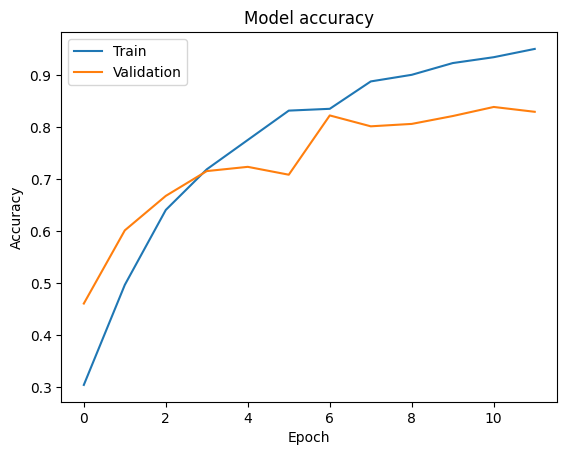

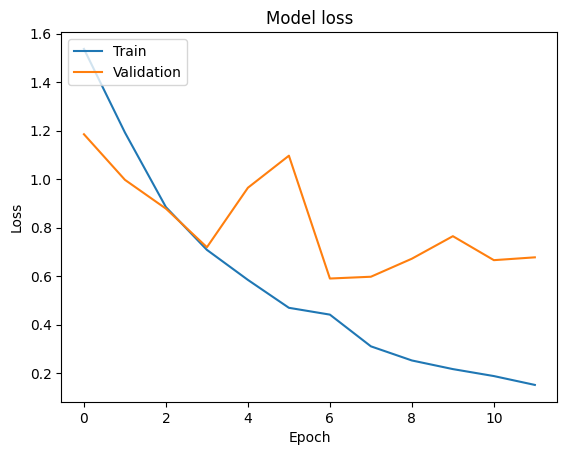

In [ ]:
plt.plot(VGGmodel_history.history['accuracy'])
plt.plot(VGGmodel_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(VGGmodel_history.history['loss'])
plt.plot(VGGmodel_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Accuracy Plot: Training accuracy plateaus around 0.95, validation accuracy around 0.82 over 12 epochs.

 Loss Plot: Training loss decreases to nearly 0.2, while validation loss levels off around 0.67.

## Saving the Model

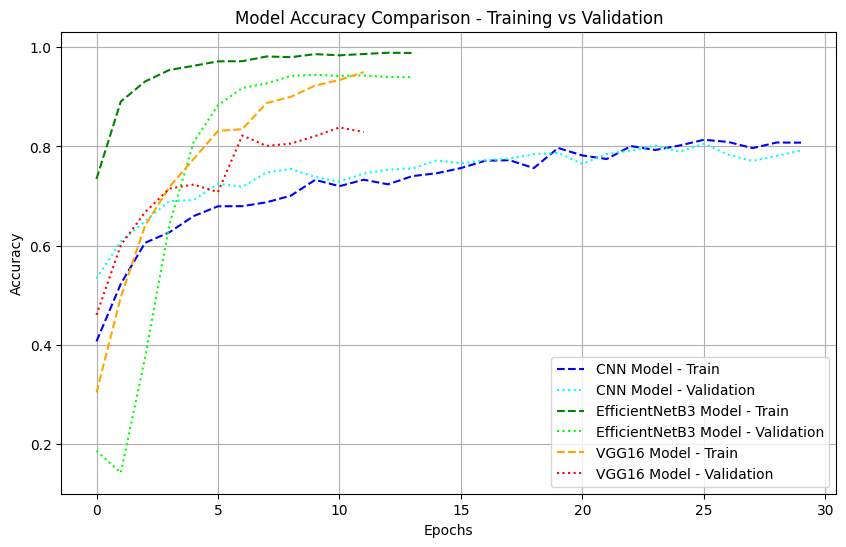

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cnnmodel_history.history['accuracy'], label='CNN Model - Train', linestyle='--', color='blue')
plt.plot(cnnmodel_history.history['val_accuracy'], label='CNN Model - Validation', linestyle=':', color='cyan')
plt.plot(efficientnet_history.history['accuracy'], label='EfficientNetB3 Model - Train', linestyle='--', color='green')
plt.plot(efficientnet_history.history['val_accuracy'], label='EfficientNetB3 Model - Validation', linestyle=':', color='lime')
plt.plot(VGGmodel_history.history['accuracy'], label='VGG16 Model - Train', linestyle='--', color='orange')
plt.plot(VGGmodel_history.history['val_accuracy'], label='VGG16 Model - Validation', linestyle=':', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - Training vs Validation')
plt.legend()
plt.grid(True)

plt.show()

1. **Model Comparisons:**
   - The **EfficientNetB3 model**  has the **highest accuracy** for both training and validation, reaching **close to 98 and 94 % respectively**.
   - **VGG16  shows a strong performance but **slightly lower than EfficientNetB3**.
   - **CNN Model  has the lowest accuracy, with validation accuracy **stagnating around 80%**.


**Conclusion**
   - **EfficientNetB3 is the best model** for this dataset.
   - **VGG16 is a strong alternative**, performing better than the CNN model.
   - **CNN struggles** to generalize and might need **more layers or better data augmentation**.



In [ ]:
from tensorflow import keras

final_model = keras.models.load_model('/kaggle/working/flowers_EfficientNetB3.keras')

In [ ]:
from tensorflow.keras.saving import save_model

save_model(efficientnet_model, '/kaggle/working/flowers_EfficientNetB3.keras')

# Making A Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: daisy


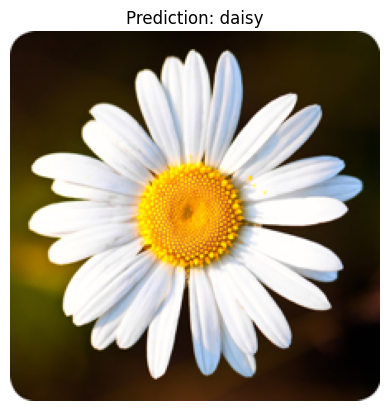

In [ ]:
image_url = 'https://www.cumbriawildflowers.co.uk/image/data/products/Leucanthemum-vulgare2.jpg'

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

image = image.resize((224, 224))

image_array = np.array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0

predictions = final_model.predict(image_array)
predicted_index = np.argmax(predictions, axis=1)

predicted_label = classes[predicted_index[0]]

print(f'Predicted Label: {predicted_label}')

plt.imshow(image)
plt.title(f'Prediction: {predicted_label}')
plt.axis('off')
plt.show()


References:

https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras

https://www.kaggle.com/datasets/alxmamaev/flowers-recognition/data

https://www.researchgate.net/publication/325803364_A_Study_on_CNN_Transfer_Learning_for_Image_Classification

https://keras.io/api/applications/efficientnet/
